# Kom i gang med DAT801-2021-konkurransen

***UNDER CONSTRUCTION***


Denne notebooken beskriver hvordan du kan:
1. Laste inn data: vi bruker Pandas til å laste inn trenings- og test-data
2. Undersøke features: vi undersøker et par features via statistikk og enkle plots.
3. Submitte dine prediksjoner for scoring (og plassering på leaderboard): etter at du har laget en modell og produsert prediksjoner på testdata så må du samle disse i en fil som Kaggle kan bruke til scoring. 

_Hvis du vil bruke denne notebooken som utgangspunkt for ditt eget arbeid kan du trykke "Fork"_

Du kan eventuelt bruke Google Colab eller din egen maskin. For å bruke Colab, (i) last ned notebooken på din egen maskin, (ii) gå til https://colab.research.google.com, logg inn, og last opp notebooken. 

# Setup

In [1]:
%matplotlib inline
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from pathlib import Path
from sklearn import datasets
plt.style.use("ggplot")
print("done")

done


In [285]:
#Approaches
# Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.linear_model import LogisticRegression # Logistic regression
from sklearn.neural_network import MLPClassifier # Neural Network
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics # compute accuracy
from sklearn import preprocessing # data scaler
from sklearn.model_selection import train_test_split # train and test split
print("done")

done


# Last inn data

## Hvis du arbeider lokalt

Last ned data via Data-menyen på konkurransens hjemmeside.

## Hvis du bruker Colab

Kjør følgende celle:

## Hvis du bruker Kaggle

In [48]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sampleSubmission = pd.read_csv('sample_submission.csv')
print("done")

done


# Ta en titt på data

In [49]:
train.head()

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,target
0,161363,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,8.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,6
1,78028,16.0,0.0,1.0,1.0,6.0,2.0,2.0,2.0,14.0,...,0.0,41.0,3.0,0.0,0.0,0.0,2.0,1.0,1.0,7
2,35324,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,5
3,67966,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1
4,110279,3.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,NaN,...,0.0,0.0,1.0,5.0,4.0,0.0,0.0,0.0,1.0,5


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 77 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      150000 non-null  int64  
 1   f_0     147000 non-null  float64
 2   f_1     148500 non-null  float64
 3   f_2     149250 non-null  float64
 4   f_3     149250 non-null  float64
 5   f_4     148500 non-null  float64
 6   f_5     149250 non-null  float64
 7   f_6     147000 non-null  float64
 8   f_7     147000 non-null  float64
 9   f_8     149250 non-null  float64
 10  f_9     148500 non-null  float64
 11  f_10    148500 non-null  float64
 12  f_11    148500 non-null  float64
 13  f_12    148500 non-null  float64
 14  f_13    148500 non-null  float64
 15  f_14    149250 non-null  float64
 16  f_15    147000 non-null  float64
 17  f_16    149250 non-null  float64
 18  f_17    148500 non-null  float64
 19  f_18    148500 non-null  float64
 20  f_19    148500 non-null  float64
 21  f_20    14

Vi ser at det er 150.000 instanser i treningsdata. Det mangler noen verdier i hver av features (som er noe en må takle ved hjelp av imputering eller lignende).

In [50]:
#Fikse verdier
train_new = train.interpolate(method ='linear', limit_direction ='forward')
train_new = train_new.interpolate(method ='linear', limit_direction ='backward', limit = 1)
train_new.info()
print("NaN in dataframe:" , train_new.isnull().values.any())  # sjekk etter NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 77 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      150000 non-null  int64  
 1   f_0     150000 non-null  float64
 2   f_1     150000 non-null  float64
 3   f_2     150000 non-null  float64
 4   f_3     150000 non-null  float64
 5   f_4     150000 non-null  float64
 6   f_5     150000 non-null  float64
 7   f_6     150000 non-null  float64
 8   f_7     150000 non-null  float64
 9   f_8     150000 non-null  float64
 10  f_9     150000 non-null  float64
 11  f_10    150000 non-null  float64
 12  f_11    150000 non-null  float64
 13  f_12    150000 non-null  float64
 14  f_13    150000 non-null  float64
 15  f_14    150000 non-null  float64
 16  f_15    150000 non-null  float64
 17  f_16    150000 non-null  float64
 18  f_17    150000 non-null  float64
 19  f_18    150000 non-null  float64
 20  f_19    150000 non-null  float64
 21  f_20    15

In [51]:
train_new.head()

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,target
0,161363,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,8.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,6
1,78028,16.0,0.0,1.0,1.0,6.0,2.0,2.0,2.0,14.0,...,0.0,41.0,3.0,0.0,0.0,0.0,2.0,1.0,1.0,7
2,35324,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,5
3,67966,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1
4,110279,3.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,1.0,5.0,4.0,0.0,0.0,0.0,1.0,5


In [52]:
test.head()

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74
0,105982,0,0,10,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
1,137351,0,0,0,0,0,1,0,0,0,...,0,0,0,0,6,0,0,0,0,0
2,151824,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,152873,1,2,0,1,2,1,1,2,0,...,4,0,1,1,0,1,1,0,0,0
4,61900,3,0,0,0,0,0,0,0,0,...,0,0,3,0,3,0,0,0,0,0


In [162]:
test.info()
print("NaN in dataframe:" , test.isnull().values.any())  # sjekk etter NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      50000 non-null  int64
 1   f_0     50000 non-null  int64
 2   f_1     50000 non-null  int64
 3   f_2     50000 non-null  int64
 4   f_3     50000 non-null  int64
 5   f_4     50000 non-null  int64
 6   f_5     50000 non-null  int64
 7   f_6     50000 non-null  int64
 8   f_7     50000 non-null  int64
 9   f_8     50000 non-null  int64
 10  f_9     50000 non-null  int64
 11  f_10    50000 non-null  int64
 12  f_11    50000 non-null  int64
 13  f_12    50000 non-null  int64
 14  f_13    50000 non-null  int64
 15  f_14    50000 non-null  int64
 16  f_15    50000 non-null  int64
 17  f_16    50000 non-null  int64
 18  f_17    50000 non-null  int64
 19  f_18    50000 non-null  int64
 20  f_19    50000 non-null  int64
 21  f_20    50000 non-null  int64
 22  f_21    50000 non-null  int64
 23  f_22    500

In [54]:
print(type(train_new))
print(train_new.shape)
print(type(test))
print(test.shape)

<class 'pandas.core.frame.DataFrame'>
(150000, 77)
<class 'pandas.core.frame.DataFrame'>
(50000, 76)


In [99]:
y = train_new.target
X = train_new.drop('target', axis=1)
y.describe() # MIN is 0 and MAX is 8, iow 9 classes. Mean 5. NN with 9 outputs?

count    150000.000000
mean          4.973673
std           2.475366
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max           8.000000
Name: target, dtype: float64

In [100]:
X.describe() # Possible Features
# Mean between approx 2.9 og 0.6

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,99987.623173,0.968657,1.173200,2.211287,2.304953,0.788603,1.436910,1.018707,0.676407,1.948610,...,1.801843,0.506473,1.823823,0.919783,1.597777,1.215417,0.803513,1.270073,2.939710,0.628303
std,57725.867322,3.888237,3.992794,6.445743,7.568214,2.909812,5.188438,3.961593,2.242827,3.935722,...,5.064860,1.842022,7.138423,3.865620,4.854218,4.806667,2.440803,4.165876,10.756576,3.893208
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49985.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,149888.250000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.500000,2.000000,...,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,199999.000000,61.000000,51.000000,64.000000,70.000000,38.000000,76.000000,43.000000,30.000000,38.000000,...,54.000000,24.000000,79.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000


In [253]:
# Check correlation
pd.set_option('display.max_rows', 500)
# Keep all above 6%
top_corr = ["f_18", "f_12", "f_16", "f_37", "f_14", "f_31", "f_56", "f_53", "f_43", "f_8", "f_44", "f_65", "f_50", "f_52", "f_1", "f_48", "f_45", "f_3", "f_30", "f_2", "f_40", "f_54", "f_7", "f_9", "f_72", "f_21", "f_55", "f_62"]
top_corr_2 = []
top_corr_3 = []
train_new.corr()["target"].sort_values(ascending=False)

target    1.000000
f_18      0.109802
f_12      0.097731
f_16      0.090603
f_37      0.087922
f_14      0.087496
f_31      0.085603
f_56      0.084611
f_53      0.082701
f_43      0.082650
f_8       0.077241
f_44      0.076788
f_65      0.064498
f_50      0.061590
f_52      0.061391
f_1       0.060546
f_48      0.060138
f_45      0.060056
f_3       0.059815
f_30      0.059128
f_2       0.058329
f_40      0.056077
f_54      0.055308
f_7       0.055286
f_9       0.054260
f_72      0.054108
f_21      0.054022
f_55      0.053300
f_62      0.053269
f_4       0.053250
f_58      0.052931
f_35      0.052212
f_67      0.051323
f_70      0.049640
f_64      0.049408
f_23      0.048935
f_13      0.048913
f_19      0.048895
f_73      0.048189
f_60      0.047921
f_28      0.047904
f_51      0.047499
f_25      0.047259
f_29      0.045890
f_46      0.045256
f_66      0.044971
f_34      0.044061
f_38      0.042906
f_0       0.041830
f_39      0.039752
f_63      0.039716
f_32      0.038512
f_41      0.

In [105]:
# kikke på data. X blir for mange features
N_features = 15
N_samples = 150000
N_start = 1
X_part1 = X.iloc[:N_samples, N_start:N_features + N_start]
y_part1 = y.iloc[:N_samples]

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14
f_0,1.000000,0.075645,0.067821,0.069994,0.070159,0.063270,0.064914,0.067080,0.066359,0.073573,0.071676,0.061295,0.066137,0.071172,0.081008
f_1,0.075645,1.000000,0.095958,0.094004,0.092523,0.067763,0.075800,0.081896,0.090350,0.085219,0.065474,0.054398,0.102096,0.083806,0.107644
f_2,0.067821,0.095958,1.000000,0.093943,0.084872,0.069798,0.073921,0.089267,0.097328,0.082314,0.062195,0.060257,0.103403,0.086755,0.105982
f_3,0.069994,0.094004,0.093943,1.000000,0.084716,0.071023,0.080472,0.082418,0.095061,0.090998,0.062393,0.060606,0.098720,0.079449,0.101177
f_4,0.070159,0.092523,0.084872,0.084716,1.000000,0.079525,0.074414,0.081603,0.078577,0.090288,0.073559,0.053592,0.092445,0.078565,0.098713
f_5,0.063270,0.067763,0.069798,0.071023,0.079525,1.000000,0.068609,0.076032,0.062457,0.074739,0.071621,0.062434,0.063551,0.074758,0.070429
f_6,0.064914,0.075800,0.073921,0.080472,0.074414,0.068609,1.000000,0.080259,0.064250,0.073438,0.066148,0.061167,0.070262,0.069422,0.075768
f_7,0.067080,0.081896,0.089267,0.082418,0.081603,0.076032,0.080259,1.000000,0.086217,0.085202,0.066759,0.050091,0.088228,0.079630,0.093621
f_8,0.066359,0.090350,0.097328,0.095061,0.078577,0.062457,0.064250,0.086217,1.000000,0.080350,0.053036,0.045900,0.110931,0.080893,0.113038
f_9,0.073573,0.085219,0.082314,0.090998,0.090288,0.074739,0.073438,0.085202,0.080350,1.000000,0.066658,0.058158,0.087703,0.076573,0.093898


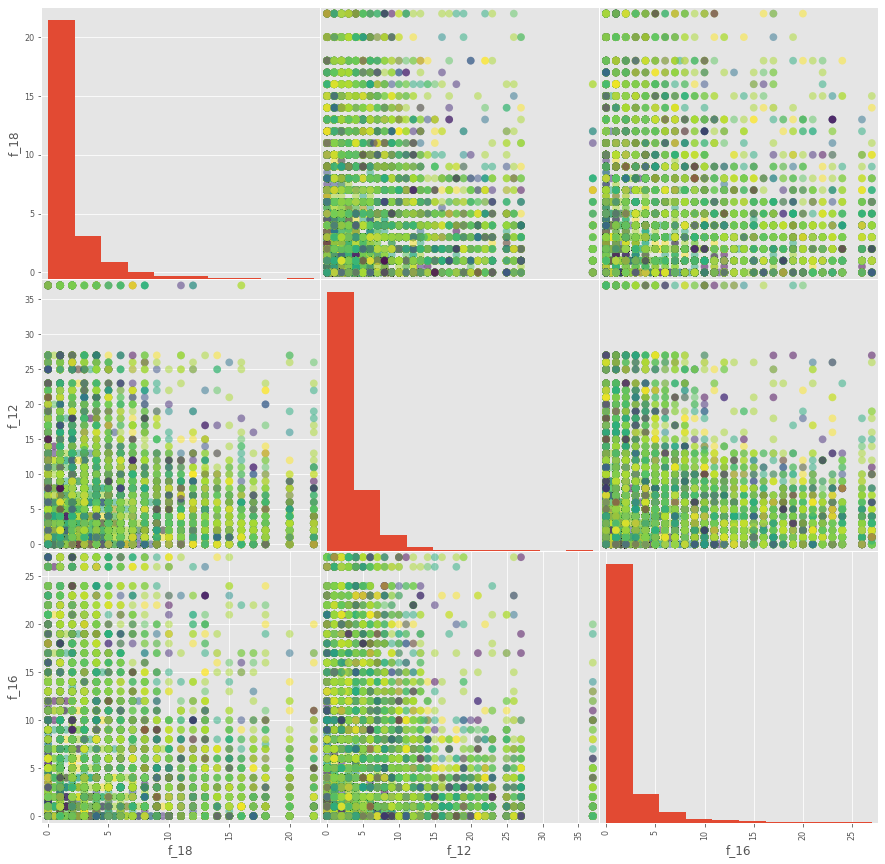

In [149]:
pd.plotting.scatter_matrix(X[top_corr_0], c=y, figsize=(15,15), marker='o', s=60)
plt.show()

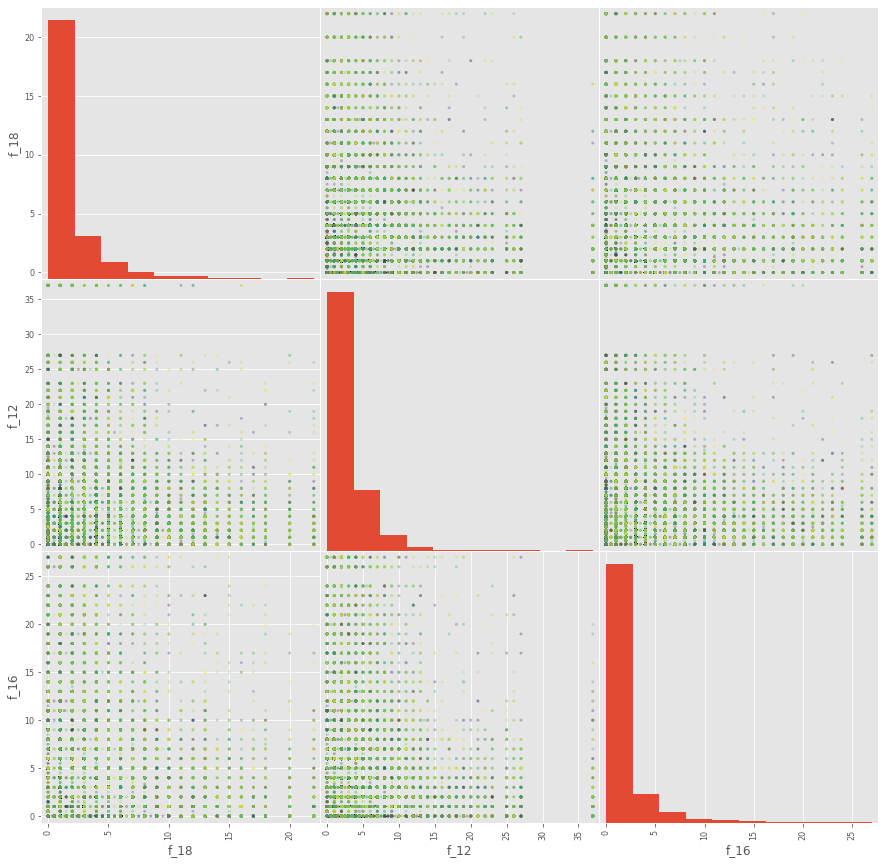

In [150]:
pd.plotting.scatter_matrix(X[top_corr_0], c=y, figsize=(15,15), alpha=0.3)
plt.show()

# Clouds = Low correlation

In [226]:
# Split train.csv into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print("set is split")

set is split


In [299]:
# Pre processing.. REMEMBER TO USE PRE PROCESS TEST SET!

from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

selective_X_train_std = std.fit_transform(X_train[top_corr])
selective_X_test_std = std.fit_transform(X_test[top_corr])

print("Scaled")

Scaled


In [271]:
#linear regression
lnn = LinearRegression().fit(X_train_std, y_train)
lnn_y_train_pred = lnn.predict(X_train_std).astype(int) #predict on train set
lnn_y_test_pred = lnn.predict(X_test_std).astype(int) # save predictions as integers

print("Train accuracy: ", metrics.accuracy_score(y_train, lnn_y_train_pred))
print("Test accuracy: ", metrics.accuracy_score(y_test, lnn_y_test_pred))

# Train accuracy:  0.12258666666666666
# Train accuracy:  0.12464

Train accuracy:  0.12258666666666666
Test accuracy:  0.12464


In [279]:
#Logistic regression
lr = LogisticRegression()
lr.fit(X_train_std,y_train)

lr_y_train_pred = lr.predict(X_train_std) #predict on train set
lr_y_test_pred = lr.predict(X_test_std) # predict on test set

print("Train accuracy: ", metrics.accuracy_score(y_train, lr_y_train_pred))
print("Test accuracy: ", metrics.accuracy_score(y_test, lr_y_test_pred))

# Train accuracy:  0.34274666666666664
# Test accuracy:  0.3396


Train accuracy:  0.34274666666666664
Test accuracy:  0.3396


In [277]:
#Logistic regression
lr2 = LogisticRegression(max_iter=5000)
lr2.fit(X_train_std,y_train)

lr2_y_train_pred = lr2.predict(X_train_std) #predict on train set
lr2_y_test_pred = lr2.predict(X_test_std) # save predictions as integers

print("Train accuracy: ", metrics.accuracy_score(y_train, lr2_y_train_pred))
print("Test accuracy: ", metrics.accuracy_score(y_test, lr2_y_test_pred))

# Train accuracy all features normalized:  0.34274666666666664
# Test accuracy all features normalized:  0.3396


Train accuracy:  0.34274666666666664
Test accuracy:  0.3396


In [ ]:
# Logistic regression not normalized with selected features (highest correlation with target)

# Train accuracy all features:  0.2935022222222222
# Test accuracy all features:  0.29376

# Train accuracy 5 features:  0.3105511111111111
# Test accuracy 5 features:  0.31221333333333334

# Train accuracy 6 features:  0.31152
# Test accuracy 6 features:  0.31325333333333333

# Train accuracy 7 features:  0.3144355555555556
# Test accuracy 7 features:  0.316

# Train accuracy 10 features:  0.31694222222222224
# Test accuracy 10 features:  0.32050666666666666

# Train accuracy 17 features:  0.32012444444444443
# Test accuracy 17 features:  0.32384

# Train accuracy 20 features:  0.32395555555555555
# Test accuracy 20 features:  0.32744

# Train accuracy all features > 5% correlation to target:  0.33093333333333336
# Test accuracy all features > 5% correlation to target:  0.3318933333333333


In [278]:
#Logistic regression normalized with selected features (highest correlation with target)

lr3 = LogisticRegression(max_iter=5000)
lr3.fit(selective_X_train_std,y_train)

lr3_y_train_pred = lr3.predict(selective_X_train_std) #predict on train set
lr3_y_test_pred = lr3.predict(selective_X_test_std) # save predictions as integers

print("Train accuracy: ", metrics.accuracy_score(y_train, lr3_y_train_pred))
print("Test accuracy: ", metrics.accuracy_score(y_test, lr3_y_test_pred))

# Train accuracy norm all features > 5% correlation to target:  0.33099555555555554
# Test accuracy norm all features > 5% correlation to target:  0.33213333333333334

Train accuracy:  0.33099555555555554
Test accuracy:  0.33213333333333334


In [290]:
# Neural network
clf = MLPClassifier(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1, max_iter=5000)
clf.fit(X_train_std, y_train)

clf_y_train_pred = clf.predict(X_train_std) #predict on train set
clf_y_test_pred = clf.predict(X_test_std) # predict on test set

print("Train accuracy: ", metrics.accuracy_score(y_train, clf_y_train_pred))
print("Test accuracy: ", metrics.accuracy_score(y_test, clf_y_test_pred))

#Train accuracy:  0.35557333333333335
# Test accuracy:  0.3504

Train accuracy:  0.35557333333333335
Test accuracy:  0.3504


In [302]:
#SGD Classifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(selective_X_train_std, y_train)

sgd_clf_y_train_pred = sgd_clf.predict(selective_X_train_std) #predict on train set
sgd_clf_y_test_pred = sgd_clf.predict(selective_X_test_std) # predict on test set

print("Train accuracy: ", metrics.accuracy_score(y_train, clf_y_train_pred))
print("Test accuracy: ", metrics.accuracy_score(y_test, clf_y_test_pred))

# Train accuracy:  0.29643555555555556
# Test accuracy:  0.2917866666666667

Train accuracy:  0.35557333333333335
Test accuracy:  0.3504


array([8, 7, 8, ..., 7, 7, 8], dtype=int64)

In [313]:
#Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(selective_X_train_std, y_train)

rf_clf_y_train_pred = rf_clf.predict(selective_X_train_std) #predict on train set
rf_clf_y_test_pred = rf_clf.predict(selective_X_train_std) # predict on test set

print("Train accuracy: ", metrics.accuracy_score(y_train, clf_y_train_pred))
print("Test accuracy: ", metrics.accuracy_score(y_test, clf_y_test_pred))

# Train accuracy:  0.29643555555555556
# Test accuracy:  0.2917866666666667


Train accuracy:  0.35557333333333335
Test accuracy:  0.3504


Det er 50.000 test-instanser, og det ser ikke ut til å mangle noen features. 

# Utforsk data, preprosesser data, utforsk modeller ("model selection"), prediker & evaluer

Jeg overlater disse delene til dere. Du bør utforske features via statistikk og plots, forsøke å avdekke sammenhenger mellom features og mellom features og labels ved å undersøke korrelasjoner og lignende, og gjerne forsøke å konstruere nye features ved å kombinere eksisterende. Før du kan trene modeller må du sørge for at data er på en egnet form. Du må blant annet finne ut hvordan du best kan takle manglende verdier ("missing values"). Husk å designe et grundig evalueringsoppsett som du kan bruke underveis i utforskingen av modeller. Kryss-validering er naturlig. Bør du kanskje vurdere stratifisert splitting i trening- og validerings-data? Hva med ensembling av flere modeller?

# Submission

Etter at du har trent din modell / dine modeller og produsert prediksjoner på test-data, så må du lage en CSV-fil på korrekt form som kan scores av Kaggle. Den skal ha samme form som `sample_submission.csv`:

In [10]:
sampleSubmission.head()

,id,target
0,105982,7
1,137351,7
2,151824,7
3,152873,7
4,61900,7


Her er en fremgangsmåte:

Vi trenger først en vektor med tilfeldige prediksjoner:

In [315]:
# lr2[top_corr] best submission.
target = rf_clf.predict(test[top_corr])
target

array([5, 7, 7, ..., 7, 7, 5], dtype=int64)

Vi kan så bygge en dataframe via en Python dictionary med nøkler ("keys") 'id' og 'target':

In [316]:
submission = pd.DataFrame({'id': test['id'], 'target': target})

In [317]:
submission.head()

,id,target
0,105982,5
1,137351,7
2,151824,7
3,152873,7
4,61900,7


Denne kan lagres som en CSV vi kan laste opp på Kaggle for scoring:

In [318]:
submission.to_csv('RF_CLF_Corr_features_above_5_submission.csv', index=False)